# Titanic Survival Prediction (ipython notebook)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn import preprocessing

In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

## Data Collection

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print train.shape
print test.shape
train['Source'] = 'train'
test['Source'] = 'test'
#y = train['Survived'].copy()
#X = train.drop(labels=['Survived'], axis = 1)
X = pd.concat([train, test])
print X.shape
#print y.sample(10)
X.sample(10)

(891, 12)
(418, 11)
(1309, 13)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Source,Survived,Ticket
289,22.0,NaN,Q,7.7500,"Connolly, Miss. Kate",0,290,3,female,0,train,1.0,370373
716,38.0,C45,C,227.5250,"Endres, Miss. Caroline Louise",0,717,1,female,0,train,1.0,PC 17757
184,4.0,NaN,S,22.0250,"Kink-Heilmann, Miss. Luise Gretchen",2,185,3,female,0,train,1.0,315153
415,NaN,NaN,S,8.0500,"Meek, Mrs. Thomas (Annie Louise Rowley)",0,416,3,female,0,train,0.0,343095
212,17.0,NaN,S,73.5000,"Deacon, Mr. Percy William",0,1104,2,male,0,test,NaN,S.O.C. 14879
608,22.0,NaN,C,41.5792,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",2,609,2,female,1,train,1.0,SC/Paris 2123
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,train,1.0,347742
31,24.0,NaN,S,31.5000,"Jefferys, Mr. Clifford Thomas",0,923,2,male,2,test,NaN,C.A. 31029
20,55.0,NaN,C,59.4000,"Rothschild, Mr. Martin",0,912,1,male,1,test,NaN,PC 17603
343,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,test,NaN,PC 17755


In [4]:
X.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [5]:
X.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Source          object
Survived       float64
Ticket          object
dtype: object

survived: 342.000000
not survived: 549.000000


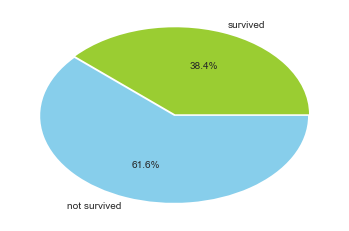

In [6]:
nsurvived = X[X['Survived']==1]
ndead = X[X['Survived']==0]
labels = "survived","not survived"
print 'survived: %f' % len(nsurvived)
print 'not survived: %f' % len(ndead)
explode = (0.01,0.01)
plt.pie([len(nsurvived),len(ndead)], explode=explode, labels=labels, colors=['yellowgreen','skyblue'], autopct="%1.1f%%")
plt.show()

## Data & Features (Exploration, Wrangling, Transformation)

In [7]:
print X.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Source            0
Survived        418
Ticket            0
dtype: int64


In [8]:
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)
X['Fare'].fillna(X['Fare'].median(), inplace=True)

In [9]:
print X.isnull().sum()
X.sample(10)

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Source            0
Survived        418
Ticket            0
dtype: int64


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Source,Survived,Ticket
406,51.0,NaN,S,7.7500,"Widegren, Mr. Carl/Charles Peter",0,407,3,male,0,train,0.0,347064
258,19.0,NaN,S,13.0000,"Bentham, Miss. Lilian W",0,1150,2,female,0,test,NaN,28404
822,38.0,NaN,S,0.0000,"Reuchlin, Jonkheer. John George",0,823,1,male,0,train,0.0,19972
639,28.0,NaN,S,16.1000,"Thorneycroft, Mr. Percival",0,640,3,male,1,train,0.0,376564
654,18.0,NaN,Q,6.7500,"Hegarty, Miss. Hanora ""Nora""",0,655,3,female,0,train,0.0,365226
173,28.0,NaN,C,7.2292,"Torfa, Mr. Assad",0,1065,3,male,0,test,NaN,2673
175,15.0,NaN,S,39.0000,"Brown, Miss. Edith Eileen",2,1067,2,female,0,test,NaN,29750
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,test,NaN,SOTON/O.Q. 3101262
287,24.0,B45,S,82.2667,"Snyder, Mr. John Pillsbury",0,1179,1,male,1,test,NaN,21228
227,28.0,NaN,Q,7.7500,"McNeill, Miss. Bridget",0,1119,3,female,0,test,NaN,370368


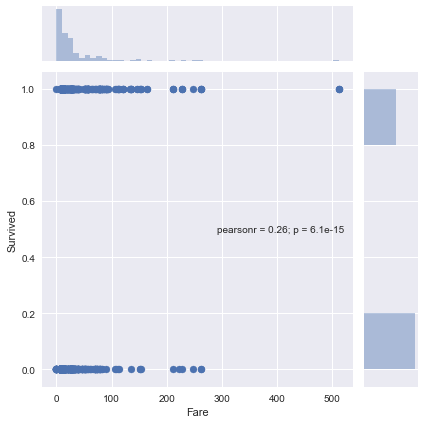

In [10]:
sns.jointplot(x='Fare', y='Survived', data=X)

We see there are outliers in 'fare'

In [11]:
X['group_count'] = X.groupby('Ticket')['Name'].transform('count')
X['ticket_shared'] = np.where(X.groupby('Ticket')['Name'].transform('count')>1, 1, 0)
print X[X['Fare']>500]
X[['group_count','ticket_shared', 'Fare','Pclass','Name']].sample(5)

      Age        Cabin Embarked      Fare  \
258  35.0          NaN        C  512.3292   
679  36.0  B51 B53 B55        C  512.3292   
737  35.0         B101        C  512.3292   
343  58.0  B51 B53 B55        C  512.3292   

                                                  Name  Parch  PassengerId  \
258                                   Ward, Miss. Anna      0          259   
679                 Cardeza, Mr. Thomas Drake Martinez      1          680   
737                             Lesurer, Mr. Gustave J      0          738   
343  Cardeza, Mrs. James Warburton Martinez (Charlo...      1         1235   

     Pclass     Sex  SibSp Source  Survived    Ticket  group_count  \
258       1  female      0  train       1.0  PC 17755            4   
679       1    male      0  train       1.0  PC 17755            4   
737       1    male      0  train       1.0  PC 17755            4   
343       1  female      0   test       NaN  PC 17755            4   

     ticket_shared  
258        

,group_count,ticket_shared,Fare,Pclass,Name
868,1,0,9.5000,3,"van Melkebeke, Mr. Philemon"
397,2,1,79.2000,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ..."
307,2,1,9.3500,3,"Aks, Master. Philip Frank"
356,2,1,51.4792,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)"
820,4,1,93.5000,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr..."


Seems that the fare is accumulation of prices form each individual in the same group. So, I updated the fare by dividing it with the number of the people in the group. Now the data seemed better. There were still some samples with fare above 100, far from the mean value. I assigned new values to them, assuming the data are noises.

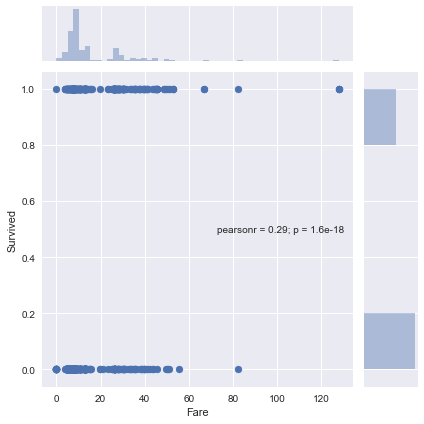

In [12]:
X['Fare'] = X['Fare']/X['group_count']
sns.jointplot(x='Fare', y='Survived', data=X)

In [13]:
#dataset.loc[dataset['fare']>100, 'fare'] = dataset['fare'].median()

In [14]:
scaler = preprocessing.StandardScaler().fit(X[['Fare']])
X[['Fare']] = scaler.transform(X[['Fare']])
X.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,group_count,ticket_shared
count,1309.000000,1.309000e+03,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000
mean,29.503186,-1.362971e-16,0.385027,655.000000,2.294882,0.498854,0.383838,2.101604,0.455309
std,12.905241,1.000382e+00,0.865560,378.020061,0.837836,1.041658,0.486592,1.779832,0.498189
min,0.170000,-1.089486e+00,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,22.000000,-5.320964e-01,0.000000,328.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,28.000000,-4.951832e-01,0.000000,655.000000,3.000000,0.000000,0.000000,1.000000,0.000000
75%,35.000000,1.791063e-02,0.000000,982.000000,3.000000,1.000000,1.000000,3.000000,1.000000
max,80.000000,8.366375e+00,9.000000,1309.000000,3.000000,8.000000,1.000000,11.000000,1.000000


In [15]:
X['name_length'] = X['Name'].apply(len)
X['cabin_known'] = np.where(X['Cabin'].isnull(),0,1)
#dataset['boat_known'] = np.where(dataset['boat'].isnull(),0,1)
#dataset['body_known'] = np.where(dataset['body'].isnull(),0,1)
X['family_size'] = X['SibSp'] + X['Parch'] + 1
X['is_alone'] = 0
X.loc[X['family_size'] == 1,'is_alone'] = 1
X['title'] = X['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
X['is_child'] = 0
X.loc[X['Age'] <= 10,'is_child'] = 1
title_min = X['title'].value_counts() < 10
X['title'] = X['title'].apply(lambda x:'Misc' if title_min.loc[x] else x)

In [16]:
X['fare_bin'] = pd.qcut(X['Fare'],3)
X.loc[X['Age']<=16, 'age_bin'] = 0
X.loc[(X['Age']>16) & (X['Age']<=32), 'age_bin'] = 1
X.loc[(X['Age']>32) & (X['Age']<=48), 'age_bin'] = 2
X.loc[X['Age']>48, 'age_bin'] = 3

In [17]:
X.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,group_count,ticket_shared,name_length,cabin_known,family_size,is_alone,is_child,age_bin
count,1309.000000,1.309000e+03,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.503186,-1.362971e-16,0.385027,655.000000,2.294882,0.498854,0.383838,2.101604,0.455309,27.130634,0.225363,1.883881,0.603514,0.065699,1.284950
std,12.905241,1.000382e+00,0.865560,378.020061,0.837836,1.041658,0.486592,1.779832,0.498189,9.506503,0.417981,1.583639,0.489354,0.247850,0.768609
min,0.170000,-1.089486e+00,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,-5.320964e-01,0.000000,328.000000,2.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,28.000000,-4.951832e-01,0.000000,655.000000,3.000000,0.000000,0.000000,1.000000,0.000000,25.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,35.000000,1.791063e-02,0.000000,982.000000,3.000000,1.000000,1.000000,3.000000,1.000000,30.000000,0.000000,2.000000,1.000000,0.000000,2.000000
max,80.000000,8.366375e+00,9.000000,1309.000000,3.000000,8.000000,1.000000,11.000000,1.000000,82.000000,1.000000,11.000000,1.000000,1.000000,3.000000


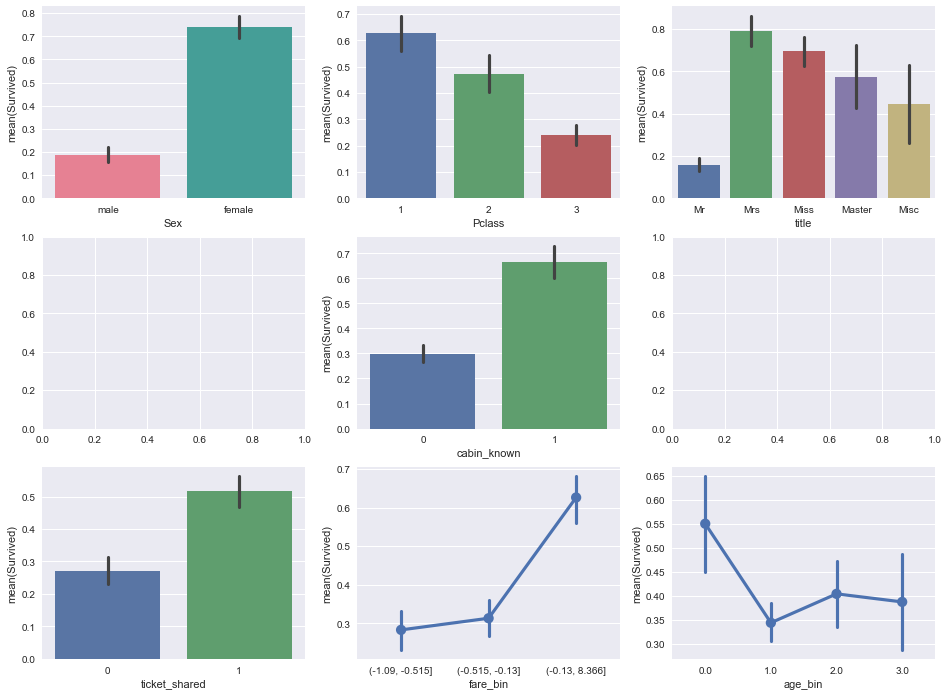

In [18]:
import warnings
warnings.filterwarnings("ignore")
fig, saxis = plt.subplots(3, 3, figsize=(16,12))
sns.barplot(x='Sex', y='Survived',palette='husl', data=X, ax=saxis[0,0])
sns.barplot(x='Pclass', y='Survived', data=X, ax=saxis[0,1])
sns.barplot(x='title', y='Survived', data=X, ax=saxis[0,2])
#sns.barplot(x='boat_known', y='survived', data=X, ax=saxis[1,0])
sns.barplot(x='cabin_known', y='Survived', data=X, ax=saxis[1,1])
#sns.barplot(x='body_known', y='survived', data=X, ax=saxis[1,2])
sns.barplot(x='ticket_shared', y='Survived', data=X, ax=saxis[2,0])
sns.pointplot(x='fare_bin', y='Survived', data=X, ax=saxis[2,1])
sns.pointplot(x='age_bin', y='Survived', data=X, ax=saxis[2,2])

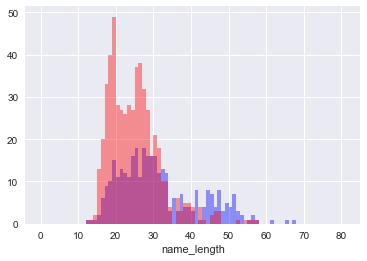

In [19]:
surv = X[X['Survived']==1]
nosurv = X[X['Survived']==0]
surv_col = "blue"
nosurv_col = "red"
sns.distplot(surv['name_length'].dropna().values, bins=range(0, 82, 1), kde=False, color=surv_col)
sns.distplot(nosurv['name_length'].dropna().values, bins=range(0, 82, 1), kde=False, color=nosurv_col,
            axlabel='name_length')

In [20]:
X.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,group_count,ticket_shared,name_length,cabin_known,family_size,is_alone,is_child,age_bin
count,1309.000000,1.309000e+03,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.503186,-1.362971e-16,0.385027,655.000000,2.294882,0.498854,0.383838,2.101604,0.455309,27.130634,0.225363,1.883881,0.603514,0.065699,1.284950
std,12.905241,1.000382e+00,0.865560,378.020061,0.837836,1.041658,0.486592,1.779832,0.498189,9.506503,0.417981,1.583639,0.489354,0.247850,0.768609
min,0.170000,-1.089486e+00,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,-5.320964e-01,0.000000,328.000000,2.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,28.000000,-4.951832e-01,0.000000,655.000000,3.000000,0.000000,0.000000,1.000000,0.000000,25.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,35.000000,1.791063e-02,0.000000,982.000000,3.000000,1.000000,1.000000,3.000000,1.000000,30.000000,0.000000,2.000000,1.000000,0.000000,2.000000
max,80.000000,8.366375e+00,9.000000,1309.000000,3.000000,8.000000,1.000000,11.000000,1.000000,82.000000,1.000000,11.000000,1.000000,1.000000,3.000000


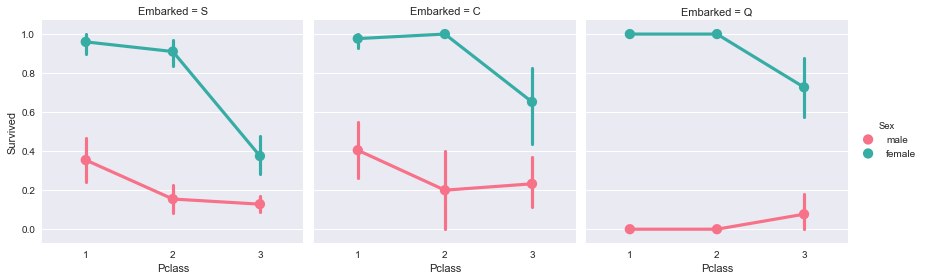

In [21]:
p = sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', palette='husl', data=X,ci=95.0)

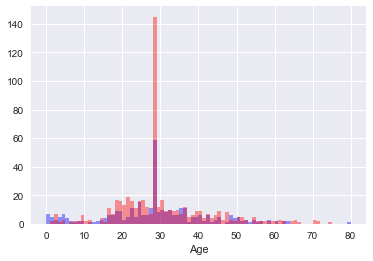

In [22]:
surv = X[X['Survived']==1]
nosurv = X[X['Survived']==0]
surv_col = "blue"
nosurv_col = "red"
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(nosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Age')

In [23]:
X['Sex'] = X['Sex'].astype('category').cat.codes
X['fare_bin'] = X['fare_bin'].astype('category').cat.codes
X['cabin_known'] = X['cabin_known'].astype('category').cat.codes
#dataset['boat_known'] = dataset['boat_known'].astype('category').cat.codes
#dataset['body_known'] = dataset['body_known'].astype('category').cat.codes
X = pd.get_dummies(X, columns=['Pclass', 'Embarked', 'title', 'fare_bin', 'age_bin', 'Sex', 'cabin_known'])
X = X.drop(labels=['Cabin','Ticket','Fare','Age','Name'], axis=1)

In [25]:



X_train = X[X['Source'] == 'train']
X_test = X[X['Source'] == 'test']
y = X_train['Survived'].copy()
X_train = X_train.drop(labels = ['PassengerId'], axis = 1)
print X_train.isnull().sum()
X_train.sample(10)

Parch              0
PassengerId        0
SibSp              0
Source             0
Survived         418
group_count        0
ticket_shared      0
name_length        0
family_size        0
is_alone           0
is_child           0
Pclass_1           0
Pclass_2           0
Pclass_3           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
title_Master       0
title_Misc         0
title_Miss         0
title_Mr           0
title_Mrs          0
fare_bin_0         0
fare_bin_1         0
fare_bin_2         0
age_bin_0.0        0
age_bin_1.0        0
age_bin_2.0        0
age_bin_3.0        0
Sex_0              0
Sex_1              0
cabin_known_0      0
cabin_known_1      0
dtype: int64
Parch              0
PassengerId        0
SibSp              0
Source             0
Survived         418
group_count        0
ticket_shared      0
name_length        0
family_size        0
is_alone           0
is_child           0
Pclass_1           0
Pclass_2           0
Pclass_3           0


,Parch,SibSp,Source,Survived,group_count,ticket_shared,name_length,family_size,is_alone,is_child,...,fare_bin_1,fare_bin_2,age_bin_0.0,age_bin_1.0,age_bin_2.0,age_bin_3.0,Sex_0,Sex_1,cabin_known_0,cabin_known_1
402,0,1,train,0.0,1,0,24,2,0,0,...,1,0,0,1,0,0,1,0,1,0
5,0,0,train,0.0,1,0,16,1,1,0,...,1,0,0,1,0,0,0,1,1,0
34,0,1,train,0.0,2,1,23,2,0,0,...,0,1,0,1,0,0,0,1,1,0
548,1,1,train,0.0,3,1,25,3,0,0,...,0,0,0,0,1,0,0,1,1,0
110,0,0,train,0.0,2,1,30,1,1,0,...,0,1,0,0,1,0,0,1,0,1
718,0,0,train,0.0,2,1,19,1,1,0,...,0,0,0,1,0,0,0,1,1,0
615,2,1,train,1.0,5,1,19,4,0,0,...,1,0,0,1,0,0,1,0,1,0
347,0,1,train,1.0,2,1,41,2,0,0,...,1,0,0,1,0,0,1,0,1,0
359,0,0,train,1.0,1,0,33,1,1,0,...,1,0,0,1,0,0,1,0,1,0
821,0,0,train,1.0,1,0,17,1,1,0,...,1,0,0,1,0,0,0,1,1,0


In [26]:
X_train = X_train.drop(labels=['Source'],axis = 1)
X_test = X_test.drop(labels=['Source'],axis = 1)
print X_test.isnull().sum()

Parch              0
PassengerId        0
SibSp              0
Survived         418
group_count        0
ticket_shared      0
name_length        0
family_size        0
is_alone           0
is_child           0
Pclass_1           0
Pclass_2           0
Pclass_3           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
title_Master       0
title_Misc         0
title_Miss         0
title_Mr           0
title_Mrs          0
fare_bin_0         0
fare_bin_1         0
fare_bin_2         0
age_bin_0.0        0
age_bin_1.0        0
age_bin_2.0        0
age_bin_3.0        0
Sex_0              0
Sex_1              0
cabin_known_0      0
cabin_known_1      0
dtype: int64


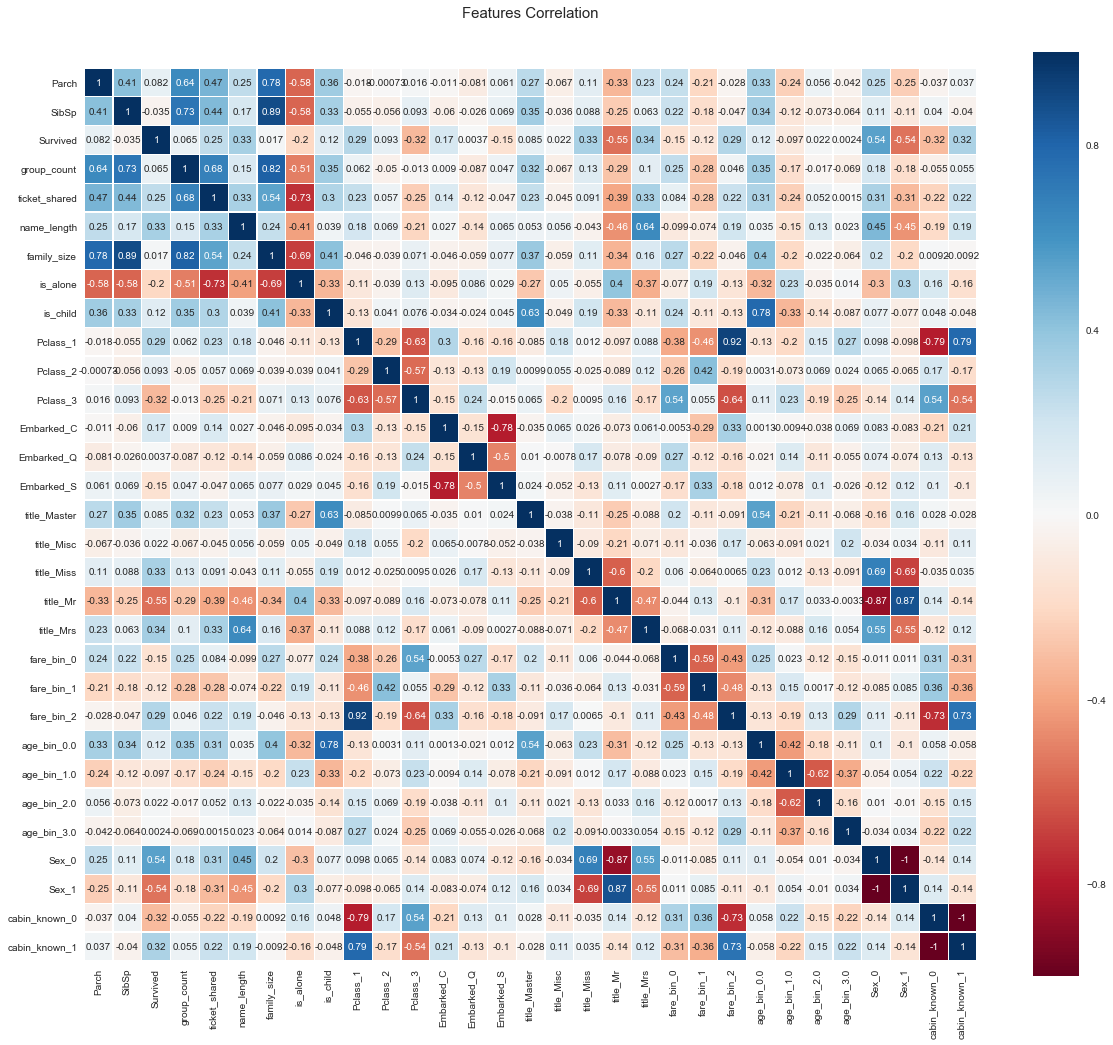

In [27]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,17))
plt.title('Features Correlation', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Modeling & Evaluation
I used accuracy score as the metric. It is a percentage of correctly predicted data. I did the measurement using cross validation. It divides the data into several folds, uses a fold unseen as a test data and repeated them for all folds. I then got several scores, I could see if the model overfit from the variance of the scores. Low variance of scores means the model is in a good shape.
I also used Randomized Search to choose the correct parameters for the model. It chose the best possible set of parameter by randomly try the options.

In [28]:
X_train = X_train.drop(labels=['Survived'],axis = 1)
X_test = X_test.drop(labels=['Survived'],axis = 1)
#cols = ['sex', 'name_length', 'is_alone', 'ticket_shared', 'pclass_1', 'pclass_2', 'pclass_3', 'cabin_known', 'boat_known', 'body_known', 'title_Master', 'title_Misc', 'title_Miss', 'title_Mr', 'title_Mrs','fare_bin_0', 'fare_bin_2']
#cols = ['sex_0', 'name_length', 'is_alone', 'ticket_shared', 'pclass_1', 'pclass_2', 'pclass_3', 'cabin_known_0', 'boat_known_0', 'body_known_0','sex_1', 'cabin_known_1', 'boat_known_1', 'body_known_1', 'title_Master', 'title_Misc', 'title_Miss', 'title_Mr', 'title_Mrs','fare_bin_0', 'fare_bin_2']

#cols = ['ticket_shared','name_length','sex_0','sex_1', 'title_Mr', 'title_Mrs', 'title_Miss','Pclass_1','Pclass_3','cabin_known_0','cabin_known_1' ]
#cols = pd.Series(coef.nlargest(20).index).tolist()
#X = dataset.loc[:,cols]

In [29]:
model_ext = ExtraTreesClassifier(
    max_features='auto',
    bootstrap=True,
    oob_score=True,
    n_estimators=1000,
    max_depth=None,
    min_samples_split=10
    #class_weight="balanced",
    #min_weight_fraction_leaf=0.02
    )
model_ext = model_ext.fit(X_train,y)
scores_ext = cross_val_score(model_ext, X_train, y, cv=5, scoring='accuracy')
print ("ExtraTrees accuracy: %0.3f (+/- %0.3f)" % (scores_ext.mean(), scores_ext.std()))

ExtraTrees accuracy: 0.829 (+/- 0.034)


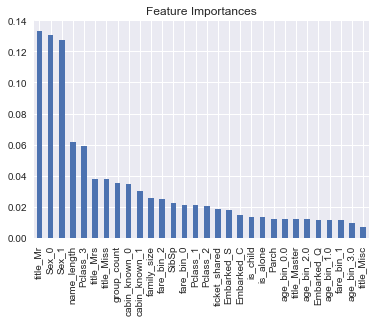

In [30]:
coef = pd.Series(model_ext.feature_importances_, X_train.columns ).sort_values(ascending=False)
coef.nlargest(50).plot(kind = 'bar', title = "Feature Importances")

In [31]:
cols = pd.Series(coef.nlargest(15).index).tolist()
#X = X.loc[:,cols]

In [32]:
model_svm = svm.SVC(
    class_weight='balanced'
    )
model_svm.fit(X_train,y)
scores_svm = cross_val_score(model_svm, X_train[cols], y, cv=5, scoring='accuracy')
print ("SVM accuracy: %0.3f (+/- %0.3f)" % (scores_svm.mean(), scores_svm.std()))

SVM accuracy: 0.811 (+/- 0.010)


In [33]:
model_xgb = xgb.XGBClassifier(
    max_depth=2,
    n_estimators=500,
    subsample=0.5,
    learning_rate=0.1
    )
model_xgb.fit(X_train,y)
scores_xgb = cross_val_score(model_xgb, X_train[cols], y, cv=5, scoring='accuracy')
print ("XGB accuracy: %0.3f (+/- %0.3f)" % (scores_xgb.mean(), scores_xgb.std()))

XGB accuracy: 0.803 (+/- 0.020)


In [34]:
param_dist = {"min_samples_leaf" : st.randint(1,10),
              "min_samples_split" : st.randint(5,15),
              "n_estimators": st.randint(5,50)}

model_ext_rs = RandomizedSearchCV(ExtraTreesClassifier(max_features='auto', bootstrap=True, oob_score=True), 
                                  param_distributions=param_dist,
                                   n_iter=150, refit=True)
model_ext_rs.fit(X_train, y)
model_ext_rs.best_score_

0.83501683501683499

In [35]:
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

param_dist = {  
    "n_estimators": st.randint(3, 47),
    "max_depth": st.randint(3, 30),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

model_xgb_rs = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions=param_dist,
                                   n_iter=150,refit=True)
model_xgb_rs.fit(X_train, y)
model_xgb_rs.best_score_

0.80134680134680136

In [36]:
param_dist = {"min_samples_leaf" : st.randint(1,10),
              "min_samples_split" : st.randint(5,15),
              "n_estimators": st.randint(5,50)}

model_rf_rs = RandomizedSearchCV(RandomForestClassifier(max_features='auto', bootstrap=True, oob_score=True), 
                                  param_distributions=param_dist,
                                   n_iter=150, refit=True)
model_rf_rs.fit(X_train, y)
model_rf_rs.best_score_

0.83389450056116721

In [37]:
param_dist = {"n_estimators": st.randint(5,50)}

model_ada_rs = RandomizedSearchCV(AdaBoostClassifier(), 
                                  param_distributions=param_dist,
                                   n_iter=100, refit=True)
model_ada_rs.fit(X_train, y)
model_ada_rs.best_score_

0.82491582491582494

In [47]:
ensemble_vote = VotingClassifier(
        estimators=[
            ('extra', model_ext_rs),
            ('rf', model_rf_rs),
            ('xgb', model_xgb_rs),
            ('ada', model_ada_rs)
        ],
        weights=[2,2,1,1],
        voting='hard'
    )
ensemble_vote.fit(X_train,y)

scores = cross_val_score(ensemble_vote, X_train, y, cv=5, scoring='accuracy')
print ("Voting accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

Voting accuracy: 0.823 (+/- 0.031)


In [38]:
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

param_dist = {  
    "n_estimators": st.randint(3, 47),
    "max_depth": st.randint(3, 30),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

prediction_ext = model_ext_rs.predict(X_train).reshape(-1,1)
prediction_rf = model_rf_rs.predict(X_train).reshape(-1,1)
prediction_ada = model_ada_rs.predict(X_train).reshape(-1,1)

df_predictions = pd.DataFrame({'RandomForest': prediction_rf.ravel(),
     'ExtraTrees': prediction_ext.ravel(),
     'AdaBoost': prediction_ada.ravel(),
    })
print df_predictions.shape
stack_xgb = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions=param_dist,
                                   n_iter=150)
stack_xgb.fit(df_predictions, y)
stack_xgb.best_score_

(891, 3)


0.88664421997755327

In [39]:
submission = pd.DataFrame(X_test['PassengerId'])
X_test = X_test.drop(labels = ['PassengerId'], axis = 1)

In [40]:
prediction_ext_test = model_ext_rs.predict(X_test).reshape(-1,1)
prediction_rf_test = model_rf_rs.predict(X_test).reshape(-1,1)
prediction_ada_test = model_ada_rs.predict(X_test).reshape(-1,1)

df_predictions_test = pd.DataFrame({'RandomForest': prediction_rf_test.ravel(),
     'ExtraTrees': prediction_ext_test.ravel(),
     'AdaBoost': prediction_ada_test.ravel(),
    })


ValueError: feature_names mismatch: [u'AdaBoost', u'ExtraTrees', u'RandomForest'] [u'Parch', u'SibSp', u'group_count', u'ticket_shared', u'name_length', u'family_size', u'is_alone', u'is_child', u'Pclass_1', u'Pclass_2', u'Pclass_3', u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'title_Master', u'title_Misc', u'title_Miss', u'title_Mr', u'title_Mrs', u'fare_bin_0', u'fare_bin_1', u'fare_bin_2', u'age_bin_0.0', u'age_bin_1.0', u'age_bin_2.0', u'age_bin_3.0', u'Sex_0', u'Sex_1', u'cabin_known_0', u'cabin_known_1']
expected RandomForest, ExtraTrees, AdaBoost in input data
training data did not have the following fields: name_length, title_Mr, Embarked_Q, Embarked_S, family_size, SibSp, fare_bin_1, fare_bin_0, cabin_known_1, Embarked_C, Sex_0, Sex_1, title_Master, Parch, fare_bin_2, is_child, title_Misc, group_count, is_alone, title_Miss, age_bin_3.0, age_bin_2.0, Pclass_1, ticket_shared, Pclass_3, Pclass_2, age_bin_1.0, cabin_known_0, age_bin_0.0, title_Mrs

In [45]:
prediction_test = stack_xgb.predict(df_predictions_test)
#y_submission = pd.DataFrame({'Id': xrange(1461,2920)})
#y_submission['Id'] = xrange(1461,2920)
submission['Survived'] = prediction_test.astype(int)
print submission.shape
print submission.dtypes
submission

(418, 2)
PassengerId    int64
Survived       int64
dtype: object


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [48]:
prediction_test = ensemble_vote.predict(X_test)
#y_submission = pd.DataFrame({'Id': xrange(1461,2920)})
#y_submission['Id'] = xrange(1461,2920)
submission['Survived'] = prediction_test.astype(int)
print submission.shape
print submission.dtypes
submission

(418, 2)
PassengerId    int64
Survived       int64
dtype: object


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [49]:
submission.to_csv('submission2.csv', index = False)